<a href="https://colab.research.google.com/github/INA-95/online_fashion_platform_BI/blob/main/online_fashion_platform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount

from google.colab import drive
drive.mount('/drive')
%cd /drive/MyDrive/Side_Project/side_project/Online_Fashion_Platform_BI_Project

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
/drive/MyDrive/Side_Project/side_project/Online_Fashion_Platform_BI_Project


In [11]:
# library

import os
from glob import glob
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
# import data
# glob
# https://tempdev.tistory.com/10
path = glob("*.csv")
df = pd.read_csv(path[0])
df.head()

,t_date,p_id,name,products,price,colour,brand,img,ratingCount,avg_rating,description,p_attributes,Return
0,2022-04-20,17048614,Khushal K Women Black Ethnic Motifs Printed Ku...,"Kurta, Palazzos, Dupatta",5099,Black,Khushal K,http://assets.myntassets.com/assets/images/170...,4522.0,4.418399,Black printed Kurta with Palazzos with dupatta...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32...",1
1,2023-09-03,16524740,InWeave Women Orange Solid Kurta with Palazzos...,"Kurta, Palazzos, Floral Print Dupatta",5899,Orange,InWeave,http://assets.myntassets.com/assets/images/165...,1081.0,4.119334,Orange solid Kurta with Palazzos with dupatta<...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32...",1
2,2023-01-07,16331376,Anubhutee Women Navy Blue Ethnic Motifs Embroi...,"Kurta, Trousers, Dupatta",4899,Navy Blue,Anubhutee,http://assets.myntassets.com/assets/images/163...,1752.0,4.161530,Navy blue embroidered Kurta with Trousers with...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ...",0
3,2021-03-19,14709966,Nayo Women Red Floral Printed Kurta With Trous...,"Kurta, Trouser, Dupatta",3699,Red,Nayo,http://assets.myntassets.com/assets/images/147...,4113.0,4.088986,Red printed kurta with trouser and dupatta<br>...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ...",0
4,2023-08-08,11056154,AHIKA Women Black & Green Printed Straight Kurta,Kurta,1350,Black,AHIKA,http://assets.myntassets.com/assets/images/110...,21274.0,3.978377,"Black and green printed straight kurta, has a ...","{'Body Shape ID': '424', 'Body or Garment Size...",1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14214 entries, 0 to 14213
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   t_date        14214 non-null  object 
 1   p_id          14214 non-null  int64  
 2   name          14214 non-null  object 
 3   products      14214 non-null  object 
 4   price         14214 non-null  int64  
 5   colour        14214 non-null  object 
 6   brand         14214 non-null  object 
 7   img           14214 non-null  object 
 8   ratingCount   6530 non-null   float64
 9   avg_rating    6530 non-null   float64
 10  description   14214 non-null  object 
 11  p_attributes  14214 non-null  object 
 12  Return        14214 non-null  int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 1.4+ MB


In [16]:
# which product did they sell the most?

def most_selling(col:str):
    cnt_of_prd = df.groupby(col)[col].count().rename_axis('product_name').reset_index(name = 'count')
    most_selling_prd = cnt_of_prd.sort_values(by = 'count', ascending = False)
    return most_selling_prd

In [20]:
most_selling_prd = most_selling('products').reset_index(drop = True)[:10]
most_selling_prd

,product_name,count
0,Jeans,941
1,Dupatta,870
2,Saree,857
3,Top,805
4,Trousers,762
5,"Lehenga, Blouse, Dupatta",693
6,Jacket,688
7,Jumpsuit,633
8,Dress Material,624
9,Skirt,484


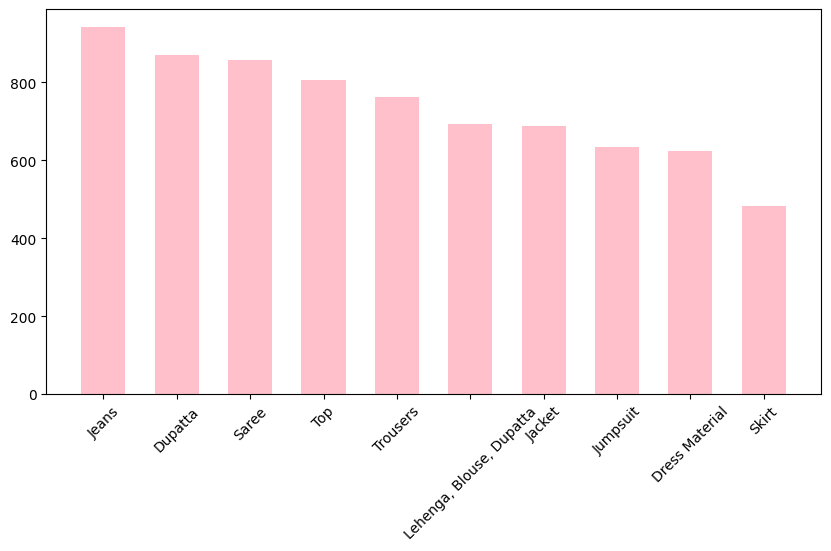

In [29]:
# most selling product visualization

x_val = [x for x in most_selling_prd['product_name']]
y_val = [y for y in most_selling_prd['count']]

fig = plt.figure(figsize = (10, 5))
plt.bar(x_val, y_val, color = 'pink', width = 0.6)
plt.xticks(rotation = 45)
plt.show()

In [30]:
# which product did the most customer get a refund

def most_refund(col:str):
    return_prd = df.groupby(col)['Return'].sum().rename_axis('product_name').reset_index(name = 'total_return')
    most_return = return_prd.sort_values(by = 'total_return', ascending = False)
    return most_return

In [31]:
most_refund('products')

,product_name,total_return
285,Jeans,473
580,Saree,447
200,Dupatta,437
844,Trousers,388
749,Top,363
...,...,...
668,"Skirt, Midi Skirt, Pencil Skirt, Floral Printe...",0
505,"Nursing & Feeding, Pure Cotton, Top",0
507,Nursing Tops,0
205,Dupattas,0


In [32]:
df1 = most_selling('products')

In [33]:
df2 = most_refund('products')

In [34]:
# return rate

df3 = pd.merge(df1, df2, on = 'product_name', how = 'inner')
df3.head()

,product_name,count,total_return
0,Jeans,941,473
1,Dupatta,870,437
2,Saree,857,447
3,Top,805,363
4,Trousers,762,388


In [35]:
return_rate = (df3['total_return'] / df3['count']) * 100
df3['return_rate'] = return_rate
df3.head()

,product_name,count,total_return,return_rate
0,Jeans,941,473,50.265675
1,Dupatta,870,437,50.229885
2,Saree,857,447,52.158693
3,Top,805,363,45.093168
4,Trousers,762,388,50.918635


In [36]:
df3 = df3.sort_values(by = 'return_rate', ascending = False)
df3.head()

,product_name,count,total_return,return_rate
909,trousers,1,1,100.0
269,Black Conversational Vacay Attire,2,2,100.0
293,"Lehenga, Choli Set",2,2,100.0
594,Cropped Parallel Trousers,1,1,100.0
596,"Cropped Top, Skirt",1,1,100.0


In [43]:
df3[df3['count']>100]

,product_name,count,total_return,return_rate
11,Palazzos,390,218,55.897436
16,Kurti,190,103,54.210526
14,Sweatshirt,288,153,53.125000
2,Saree,857,447,52.158693
7,Jumpsuit,633,324,51.184834
9,Skirt,484,247,51.033058
4,Trousers,762,388,50.918635
13,Shorts,327,166,50.764526
18,Pullover,161,81,50.310559
0,Jeans,941,473,50.265675


In [14]:
# stedy seller
# steady : yearly? monthly? quarterly?
# customer constantly make a purchase : steady purchase rate? average purchase rate?

In [44]:
# convert t_date object into datetime

df['t_date'] = pd.to_datetime(df['t_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14214 entries, 0 to 14213
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   t_date        14214 non-null  datetime64[ns]
 1   p_id          14214 non-null  int64         
 2   name          14214 non-null  object        
 3   products      14214 non-null  object        
 4   price         14214 non-null  int64         
 5   colour        14214 non-null  object        
 6   brand         14214 non-null  object        
 7   img           14214 non-null  object        
 8   ratingCount   6530 non-null   float64       
 9   avg_rating    6530 non-null   float64       
 10  description   14214 non-null  object        
 11  p_attributes  14214 non-null  object        
 12  Return        14214 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 1.4+ MB


In [45]:
df['year'] = df['t_date'].dt.year
df['month'] = df['t_date'].dt.month
df['day'] = df['t_date'].dt.day

In [46]:
temp = df.groupby(['year', 'month', 'day','products'])['products'].count().to_frame()
temp.head()

products
year month day products                   
2021 1     1   Blouse                    1
               Dupatta                   2
               Jeans                     2
               Joggers, Jumpsuit         1
               Jumpsuit                  1

In [47]:
temp = temp.rename(columns = {'products':'num_purchase'})

In [63]:
temp.reset_index()

,year,month,day,products,num_purchase
0,2021,1,1,Blouse,1
1,2021,1,1,Dupatta,2
2,2021,1,1,Jeans,2
3,2021,1,1,"Joggers, Jumpsuit",1
4,2021,1,1,Jumpsuit,1
...,...,...,...,...,...
11751,2023,12,30,"Kurta, Trousers, Dupatta",1
11752,2023,12,30,Kurti,1
11753,2023,12,30,Shrug,1
11754,2023,12,30,"Top, Palazzos",1


In [64]:
# purchase trend(yearly/monthly) : sum

def purchase_trend(period:str):
    purchase_trend = temp.groupby(['products', period])['num_purchase'].sum().reset_index()
    return purchase_trend

def top_n_within_period(period:str, n:int):
    top_n_purchase_trend= purchase_trend.groupby(period).apply(lambda x : x.nlargest(n, ['num_purchase']))
    top_n_purchase_trend.reset_index(drop = True)
    return top_n_purchase_trend

In [69]:
# purchase trend(yearly/monthly) : mean

def purchase_trend_mean(period:str):
    purchase_trend_mean = temp.groupby(['products', period])['num_purchase'].mean().reset_index()
    return purchase_trend_mean

def top_n_mean_within_period(period:str, n:int):
    top_n_purchase_mean = purchase_trend_mean.groupby(period).apply(lambda x : x.nlargest(n, ['num_purchase']))
    top_n_purchase_mean = top_n_purchase_mean.reset_index(drop = True)
    return top_n_purchase_mean